In [1]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# importing library
from PyPulseHeatPipe import PulseHeatPipe, DataVisualisation

## DI vs Al2O3 40FR 80W

In [2]:
# data loading from already calculated csv files

# data loading for DI Water
csv_file_path_mean_di = "data/di_water_exp/40_FR/combined_mean.csv"
csv_file_path_std_di = "data/di_water_exp/40_FR/combined_std.csv"

df_mean_di = pd.read_csv(csv_file_path_mean_di, index_col=0)
df_std_di = pd.read_csv(csv_file_path_std_di, index_col=0)

# data loading for NF
csv_file_path_mean = "data/al2o3_diwater_exp/40_FR/combined_mean.csv"
csv_file_path_std = "data/al2o3_diwater_exp/40_FR/combined_std.csv"

df_mean_nf = pd.read_csv(csv_file_path_mean, index_col=0)
df_std_nf = pd.read_csv(csv_file_path_std, index_col=0)

Function for regression for PHP

In [3]:
def np_reg(X, y, degree, new_X=None):
    # Reshape input data if needed
    X = np.array(X).reshape(-1, 1)
    y = np.array(y).reshape(-1, 1)
    if new_X is not None:
        new_X = np.array(new_X).reshape(-1, 1)
        
    # Create polynomial features
    poly_features = PolynomialFeatures(degree=degree)
    X_poly = poly_features.fit_transform(X)
    
    # Fit polynomial regression model
    model = LinearRegression()
    model.fit(X_poly, y)
    
    # Get the coefficients
    coefficients = model.coef_
    
    # Generate regression equation
    regression_equation = f'y = {coefficients[0][0]:.2f}'
    for i in range(1, len(coefficients)):
        coefficient_value = coefficients[i][0]
        regression_equation += f' + {coefficient_value:.2f} * x^{i}'
    
    # Predict y values for new_X if provided
    y_pred = None
    if new_X is not None:
        new_X_poly = poly_features.transform(new_X)
        y_pred = model.predict(new_X_poly)
    
    return coefficients, regression_equation, y_pred

In [10]:
def np_plot(y_reg_di, y_reg_nf, steps=5, x:str='Te[K]', y:str='Tc[K]', sample_nf:str='Al203_DI_40FR', sample_di:str='DI_Water_40FR'):

    ## subploting structure
    plt.figure(figsize=(18,9))

    # step for data selection 
    steps = steps

    ## defining variable for subplot 2,1,1
    x = x
    y = y
    sample_nf = sample_nf
    sample_di = sample_di

    ## First plot DIWATER
    df_mean = df_mean_di # NOTE: select correct input variable DI Water
    df_std = df_std_di

    idx = df_std.index
    df_mean_idxx = df_mean.loc[idx]

    frames=[]
    frames_std=[]
    for i in range(0, df_mean_idxx.shape[0], steps):
        frames.append(df_mean_idxx.iloc[i, :])
        frames_std.append(df_std.iloc[i, :])
        df_mean_idx = pd.concat(frames, axis=1)
        df_std_ = pd.concat(frames_std, axis=1)
        df_std_ = df_std_.T
        df_mean_idx = df_mean_idx.T
    
    plt.plot(df_mean[x], y_reg_di,c='b', label=f'Regression_line_{sample_di}')
    plt.scatter(x=df_mean[x], y=df_mean[y], c='b', marker="x", alpha=0.4, label=f'Experimental_Data_{sample_di}')
    plt.scatter(x=df_mean_idx[x], y=df_mean_idx[y], c='r', label=f"Mean-{sample_di}")
    plt.errorbar(x=df_mean_idx[x], y=df_mean_idx[y], yerr=df_std_[y], fmt=" ", ecolor='b', capsize=5, label=f"Expanded Uncertainty-{sample_di}")


    #NOTE: Plot Overlapping with NANOFluid Sample
    df_mean = df_mean_nf # NOTE: select correct input variable NANOFLUID
    df_std = df_std_nf

    idx = df_std.index
    df_mean_idxx = df_mean.loc[idx]

    frames=[]
    frames_std=[]
    for i in range(0, df_mean_idxx.shape[0], steps):
        frames.append(df_mean_idxx.iloc[i, :])
        frames_std.append(df_std.iloc[i, :])
        df_mean_idx = pd.concat(frames, axis=1)
        df_std_ = pd.concat(frames_std, axis=1)
        df_std_ = df_std_.T
        df_mean_idx = df_mean_idx.T
    
    plt.plot(df_mean[x], y_reg_nf, c='orange', label=f'Regression_line_{sample_nf}')
    plt.scatter(x=df_mean[x], y=df_mean[y], c='orange', marker='x', alpha=0.4, label=f'Experimental_Data_{sample_nf}')
    plt.scatter(x=df_mean_idx[x], y=df_mean_idx[y], c='g', label=f"Mean-{sample_nf}")
    plt.errorbar(x=df_mean_idx[x], y=df_mean_idx[y], yerr=df_std_[y], fmt=" ", ecolor='y', capsize=5, label=f"Expanded Uncertainty-{sample_nf}")

    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(f"{sample_di}_vs_{sample_nf}")
    plt.legend()

    plt.savefig(f"data/al2o3_diwater_exp/40_FR/{sample_di}_vs_{sample_nf}.pdf")
    msg=f"plot successfully saved as --> {sample_di}_vs_{sample_nf}.pdf"
    return print(msg), plt.show()

In [11]:
# example use of np_reg
xx = 'Te[K]'
yy = 'Tc[K]'
coeff_di, reg_eq_di, y_pred_di = np_reg(X=df_mean_di[xx], y=df_mean_di[yy], degree=3, new_X=df_mean_di[xx])
coeff_nf, reg_eq_nf, y_pred_nf = np_reg(X=df_mean_nf[xx], y=df_mean_nf[yy], degree=3, new_X=df_mean_nf[xx])
print(f'coefficients DI Water: {coeff_di}')
print(f'coefficients Nanofluid: {coeff_nf}')

coefficients DI Water: [[ 0.00000000e+00 -2.61475456e+00 -3.12153795e-04  1.04674737e-05]]
coefficients Nanofluid: [[ 0.00000000e+00 -7.44540400e+01  2.18361143e-01 -2.10952138e-04]]


Function to plot errorbars for PHP

plot successfully saved as --> DI_Water_40FR_vs_Al203_DI_40FR.pdf


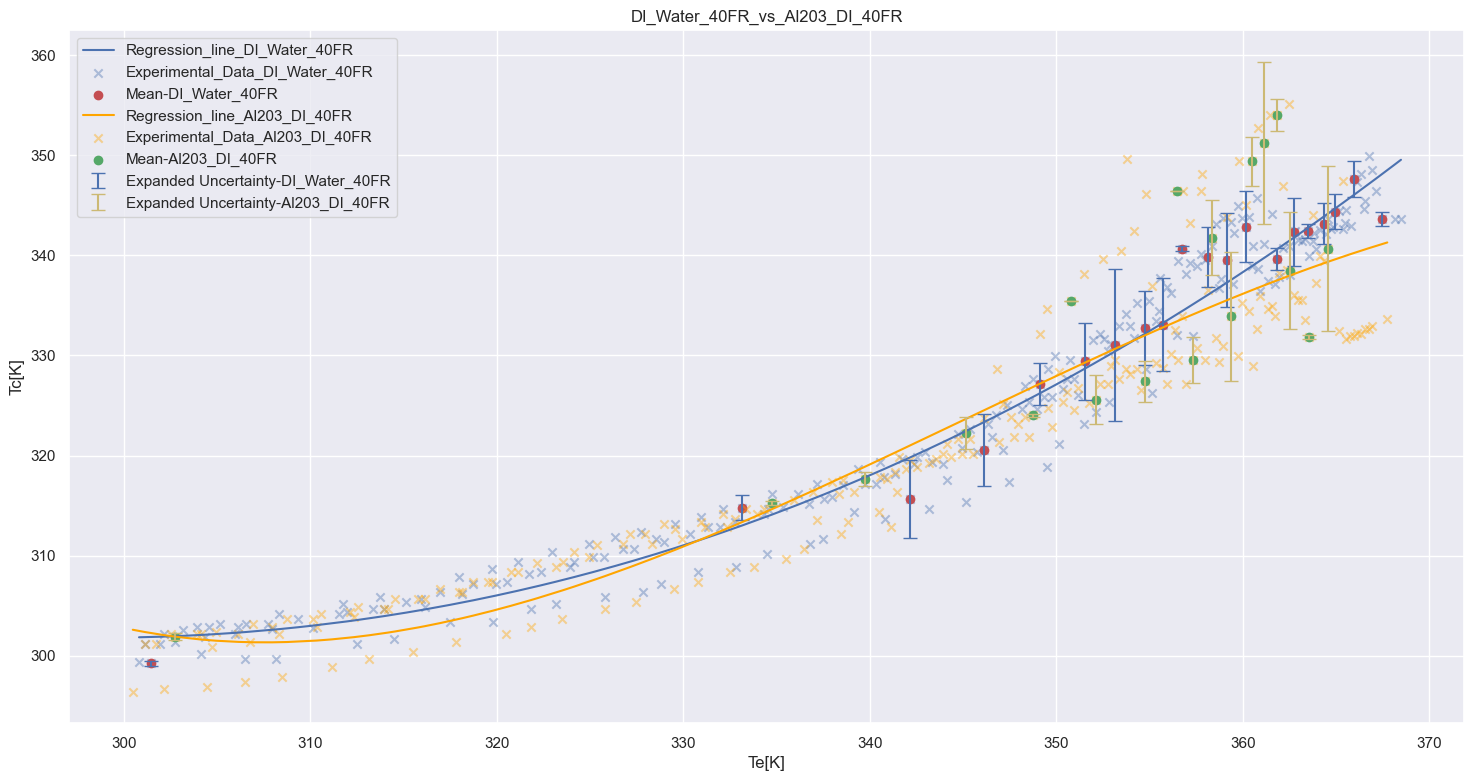

(None, None)

In [12]:
# example how to use function
np_plot(y_reg_di=y_pred_di, y_reg_nf=y_pred_nf, steps=5, x='Te[K]', y='Tc[K]', sample_nf = 'Al203_DI_40FR', sample_di = 'DI_Water_40FR')